In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

In [2]:
INPUT_DIR = 'C:/ZhangLI/Codes/DataSet/m5-forecasting-accuracy'
calendar = pd.read_csv(f'{INPUT_DIR}/calendar.csv')
selling_prices = pd.read_csv(f'{INPUT_DIR}/sell_prices.csv')
sample_submission = pd.read_csv(f'{INPUT_DIR}/sample_submission.csv')
sales_train_val = pd.read_csv(f'{INPUT_DIR}/sales_train_validation.csv')

In [41]:
calendar


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1964,2016-06-15,11620,Wednesday,5,6,2016,d_1965,NaN,NaN,NaN,NaN,0,1,1
1965,2016-06-16,11620,Thursday,6,6,2016,d_1966,NaN,NaN,NaN,NaN,0,0,0
1966,2016-06-17,11620,Friday,7,6,2016,d_1967,NaN,NaN,NaN,NaN,0,0,0
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0


In [53]:
sales_train_val_new = sales_train_val.set_index('id')[d_cols].T.reset_index().rename(columns={'index':'d'}).merge(calendar, how='left', validate='1:1').set_index('date')

In [57]:
sales_train_val_new

,d,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
date,,,,,,,,,,,,,,,,,,,,,
2011-01-29,d_1,0,0,0,0,0,0,0,12,2,...,1,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-01-30,d_2,0,0,0,0,0,0,0,15,0,...,2,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-01-31,d_3,0,0,0,0,0,0,0,0,7,...,3,1,2011,NaN,NaN,NaN,NaN,0,0,0
2011-02-01,d_4,0,0,0,0,0,0,0,0,3,...,4,2,2011,NaN,NaN,NaN,NaN,1,1,0
2011-02-02,d_5,0,0,0,0,0,0,0,0,0,...,5,2,2011,NaN,NaN,NaN,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-04-20,d_1909,1,1,1,0,1,0,1,4,0,...,5,4,2016,NaN,NaN,NaN,NaN,0,0,0
2016-04-21,d_1910,3,0,0,1,2,0,0,6,0,...,6,4,2016,NaN,NaN,NaN,NaN,0,0,0
2016-04-22,d_1911,0,0,1,3,2,2,0,3,0,...,7,4,2016,NaN,NaN,NaN,NaN,0,0,0


In [59]:
ids = sorted(list(set(sales_train_val['id'])))  # all items
d_cols = [c for c in sales_train_val.columns if 'd_' in c]  # how many sale in every day

# 查看某一个商品的销售情况
x_1 = sales_train_val.loc[sales_train_val['id'] == ids[2]].set_index('id')[d_cols].values[0]
x_2 = sales_train_val.loc[sales_train_val['id'] == ids[1]].set_index('id')[d_cols].values[0]
x_3 = sales_train_val.loc[sales_train_val['id'] == ids[17]].set_index('id')[d_cols].values[0]

fig, axes = plt.subplots(1, 3, figsize=(15, 3))
sns.lineplot(data=sales_train_val_new, x='date', y='HOBBIES_1_001_CA_1_validation', ax=axes[0])
# plt.plot(x_2)
plt.show()

KeyboardInterrupt: 

<AxesSubplot:title={'center':'FOODS_3_090_CA_3 sales by actual sale dates'}, xlabel='date'>

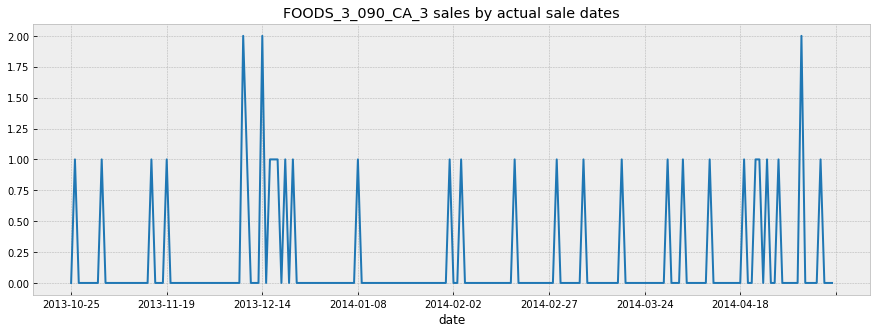

In [73]:
plt.style.use('bmh')
sales_train_val_new['HOBBIES_1_002_CA_1_validation'][1000:1200].plot(figsize=(15, 5), color=next(color_cycle), title='FOODS_3_090_CA_3 sales by actual sale dates')

In [37]:
sales_train_val

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,1,0,0,1,0,3,1,3


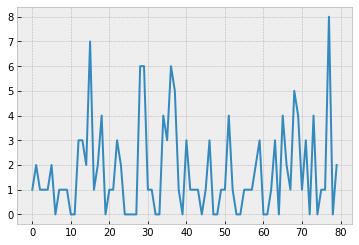

In [111]:
# 小波变换
import pywt
plt.plot(x_1[0:80])
coeff = pywt.wavedec(x_1, wavelet='db4', mode='per')
sigma = (1/0.6745)* np.mean(np.absolute(coeff[-1]-np.mean(coeff[-1])))
uthresh = sigma * np.sqrt(2*np.log(len(x_1)))

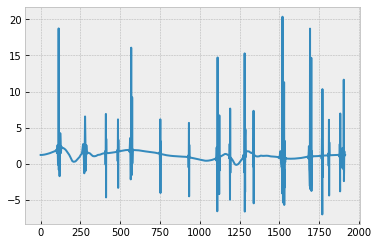

In [113]:
coeff[1:] = (pywt.threshold(i, value=uthresh, mode='hard') for i in coeff[1:])
y_w1 = pywt.waverec(coeff, 'db4', mode='per')
plt.plot(y_w1)

In [120]:
def average_smoothing():
    pass
sample = []
start = 0
end = 3 # kernel_size
# np.mean()
x_1
start += 1
end = 3+1
np.ones(4-1)*np.mean(x_1[2:5])

array([1., 1., 1.])